In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report

plt.style.use('./deeplearning.mplstyle')
RANDOM_STATE = 30

In [86]:
# df = pd.read_csv("training_malicious_url.csv")
df = pd.read_csv("combined_dataset.csv")
# df.head()

In [87]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Type'])
print(label_encoder.classes_)
# Count the occurrences of each class in the 'Type' column
type_counts = df['Type'].value_counts()

# Print the counts for each class
print(type_counts)

['harmful' 'safe']
Type
harmful    1400
safe       1400
Name: count, dtype: int64


In [88]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['Content']], y, test_size=0.2, random_state=42)

# Initialize and fit TF-IDF vectorizer on training data
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train['Content'])
X_test_transformed = vectorizer.transform(X_test['Content']) 

In [89]:
model = RandomForestClassifier(random_state=42)

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(model, X_train_transformed, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores and average
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean():.4f}")

Cross-validation scores: [0.92857143 0.91964286 0.91517857 0.93973214 0.9375    ]
Average cross-validation score: 0.9281


In [90]:
cv_scores = cross_val_score(model, X_train_transformed, y_train, cv=10, scoring='accuracy')

# Print cross-validation scores and average
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean():.4f}")

Cross-validation scores: [0.93303571 0.92410714 0.91517857 0.93303571 0.91071429 0.92410714
 0.9375     0.93303571 0.95089286 0.91964286]
Average cross-validation score: 0.9281


In [91]:
cv_scores = cross_val_score(model, X_train_transformed, y_train, cv=3, scoring='accuracy')

# Print cross-validation scores and average
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean():.4f}")

Cross-validation scores: [0.92771084 0.90896921 0.94504021]
Average cross-validation score: 0.9272


Text(0.5, 1.0, 'Confusion Matrix')

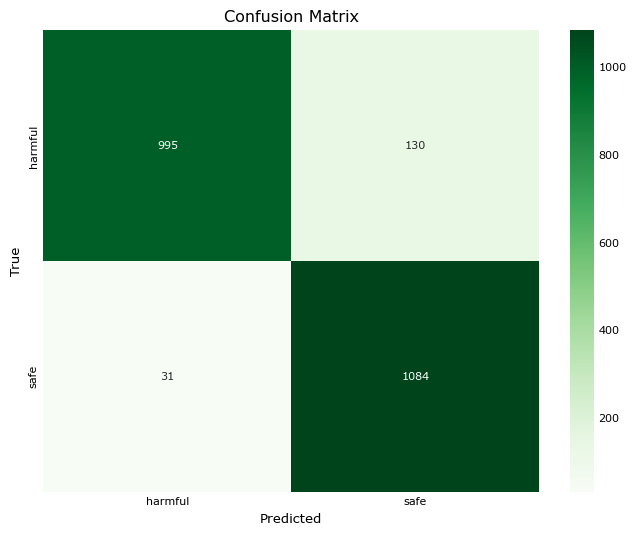

In [92]:

model.fit(X_train_transformed, y_train)
predictions = cross_val_predict(model, X_train_transformed, y_train, cv=5)

conf_matrix = confusion_matrix(y_train, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
# plt.show()

In [93]:
# Classification Report
class_report = classification_report(y_train, predictions)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.93      1125
           1       0.89      0.97      0.93      1115

    accuracy                           0.93      2240
   macro avg       0.93      0.93      0.93      2240
weighted avg       0.93      0.93      0.93      2240



In [94]:
# Predict on training and test data
y_train_pred = model.predict(X_train_transformed)
y_test_pred = model.predict(X_test_transformed)

# Print training accuracy
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(y_train, y_train_pred):.4f}")

# Print test accuracy
print(f"Metrics test:\n\tAccuracy score: {accuracy_score(y_test, y_test_pred):.4f}")

Metrics train:
	Accuracy score: 0.9996
Metrics test:
	Accuracy score: 0.9304


In [95]:
# eval_set = [(X_train_eval,y_train_eval)]
# # early_stopping_rounds = 10

# xgb_model = XGBClassifier(n_estimators = 200, learning_rate = 0.05, max_depth=6, verbosity = 1, random_state = RANDOM_STATE, early_stopping_rounds=10)
# xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])

In [96]:
# xgb_model.best_iteration

In [97]:
# print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train_transformed), y_train):.4f}")
# print(f"Metrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_test_transformed), y_test):.4f}")

In [98]:
# Get the confusion matrix
# cm = confusion_matrix(y_test, xgb_model.predict(X_test_transformed))
# print(cm)

# Plot confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()

In [99]:
# print(classification_report(y_test, xgb_model.predict(X_test_transformed)))

In [100]:
# Example URL to predict
# url = "https://eezxodullgeunn.webflow.io"  # Example phishing URL
url = "www.google.com"  # Example phishing URL

# Transform the URL using the same vectorizer used during training
url_transformed = vectorizer.transform([url])  # Make sure the URL is wrapped in a list

# Predict using the trained model
random_prediction = model.predict(url_transformed)

# Inverse transform the prediction if necessary (e.g., for label encoding)
random_predicted_class = label_encoder.inverse_transform(random_prediction)

# Predict using the trained model
# xgb_prediction = xgb_model.predict(url_transformed)

# Inverse transform the prediction if necessary (e.g., for label encoding)
# xgb_predicted_class = label_encoder.inverse_transform(xgb_prediction)

# Output the prediction (safe or phishing)
print(f"Random Forest prediction for: '{url}' -> {random_predicted_class[0]}")
# print(f"XGBoost Prediction for '{url}' -> {xgb_predicted_class[0]}")

Random Forest prediction for: 'www.google.com' -> harmful


In [101]:
# Example text for prediction (SMS content)
text = "u r subscribed 2 TEXTCOMP 250 wkly comp. 1st wk?s free question follows, subsequent wks charged@150p/msg.2 unsubscribe txt STOP 2 84128,custcare 08712405020"

# Assuming the vectorizer and models are already trained:
# Transform the text using the same vectorizer used during training
text_transformed = vectorizer.transform([text])  # Make sure the text is wrapped in a list

# Predict using the trained RandomForest model
random_prediction = model.predict(text_transformed)

# Inverse transform the prediction if necessary (e.g., for label encoding)
random_predicted_class = label_encoder.inverse_transform(random_prediction)

# Predict using the trained XGBoost model
# xgb_prediction = xgb_model.predict(text_transformed)

# Inverse transform the prediction if necessary (e.g., for label encoding)
# xgb_predicted_class = label_encoder.inverse_transform(xgb_prediction)

# Output the predictions (safe or phishing)
print(f"Random Forest prediction for: '{text}' -> {random_predicted_class[0]}")
# print(f"XGBoost Prediction for '{text}' -> {xgb_predicted_class[0]}")

Random Forest prediction for: 'u r subscribed 2 TEXTCOMP 250 wkly comp. 1st wk?s free question follows, subsequent wks charged@150p/msg.2 unsubscribe txt STOP 2 84128,custcare 08712405020' -> harmful


In [ ]:
import glob
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

dataset_files = glob.glob("new_dataset_*.csv")  # adjust folder/path as needed

# Loop through each dataset and perform training and evaluation
for file_path in dataset_files:
    print(f"Processing dataset: {file_path}")
    
    # Read the dataset
    df = pd.read_csv(file_path)
    
    # Encode the labels
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(df['Type'])
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df[['Content']], y, test_size=0.2, random_state=42)
    
    # Initialize and fit TF-IDF vectorizer on training data
    vectorizer = TfidfVectorizer()
    X_train_transformed = vectorizer.fit_transform(X_train['Content'])
    X_test_transformed = vectorizer.transform(X_test['Content'])
    
    # Initialize and train the model
    model = RandomForestClassifier(random_state=42, class_weight='balanced')  # Adding class_weight='balanced'
    model.fit(X_train_transformed, y_train)
    
    # Make predictions on the test set
    predictions = model.predict(X_test_transformed)
    
    # Print the classification report for the current dataset
    report = classification_report(y_test, predictions, zero_division=0)  # Avoid warning
    print("Classification Report:")
    print(report)
    print("-" * 40)


Processing dataset: new_dataset_10_90.csv


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       253
           1       0.78      0.26      0.39        27

    accuracy                           0.92       280
   macro avg       0.85      0.63      0.67       280
weighted avg       0.91      0.92      0.90       280

----------------------------------------
Processing dataset: new_dataset_20_80.csv
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       216
           1       0.89      0.64      0.75        64

    accuracy                           0.90       280
   macro avg       0.90      0.81      0.84       280
weighted avg       0.90      0.90      0.89       280

----------------------------------------
Processing dataset: new_dataset_30_70.csv
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       188
  